تنظیمات آزمایش – Experiment Setup

    دیتاست: MNIST (تصاویر دست‌نویس 28×28)

    معیار ارزیابی: Accuracy (دقت)

    توابع فعال‌سازی تست‌شده: Sigmoid, Tanh, ReLU, Leaky ReLU, Swish

    ساختار مدل:

        ورودی → Flatten

        Dense(128) با تابع فعال‌سازی مورد تست

        Dense(64) با همان تابع

        Dense(10, Softmax) برای خروجی چندکلاسه

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import sigmoid, tanh, relu, swish

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

activations = {
    "Sigmoid": 'sigmoid',
    "Tanh": 'tanh',
    "ReLU": 'relu',
    "Swish": tf.nn.swish
}

results = {}

for name, act in activations.items():
    print(f"\nTraining model with {name} activation...")
    
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=act),
        Dense(64, activation=act),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    results[name] = test_acc
    print(f"{name} Test Accuracy: {test_acc:.4f}")

print("\nFinal Results:", results)



Training model with Sigmoid activation...


c:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sigmoid Test Accuracy: 0.9472

Training model with Tanh activation...
Tanh Test Accuracy: 0.9660

Training model with ReLU activation...
ReLU Test Accuracy: 0.9714

Training model with Swish activation...
Swish Test Accuracy: 0.9727

Final Results: {'Sigmoid': 0.9472000002861023, 'Tanh': 0.9660000205039978, 'ReLU': 0.9714000225067139, 'Swish': 0.9726999998092651}


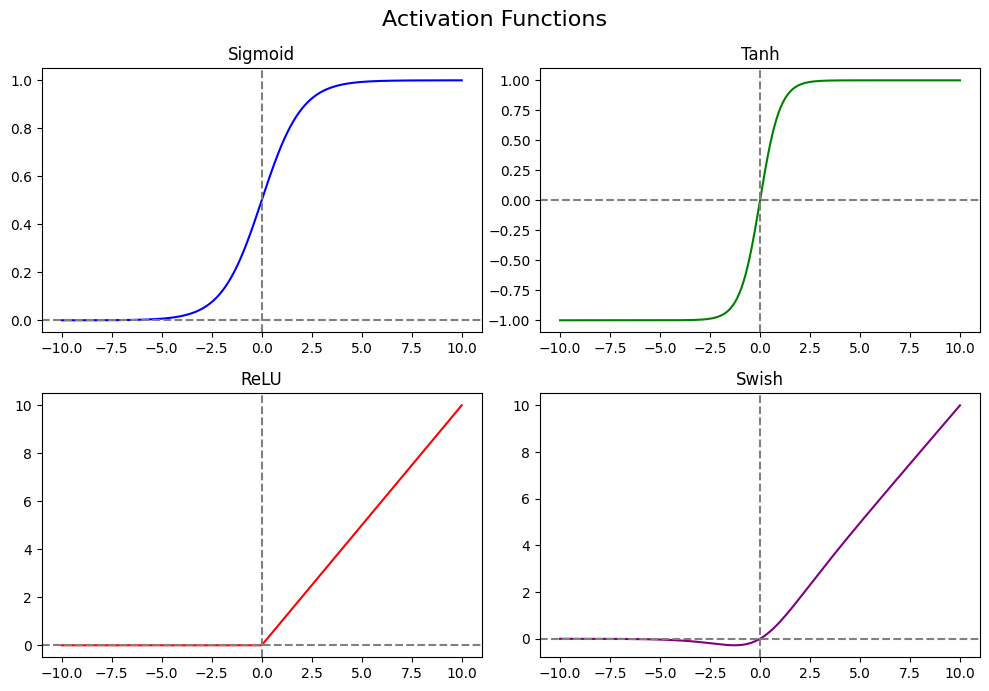

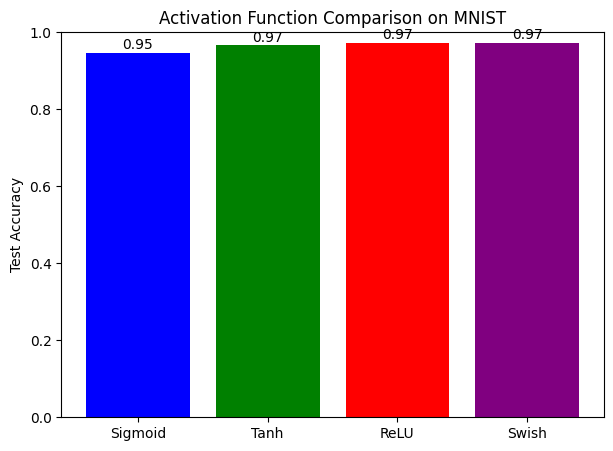

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)
def swish(x): return x * sigmoid(x)

x_vals = np.linspace(-10, 10, 400)

plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.plot(x_vals, sigmoid(x_vals), color='blue')
plt.title("Sigmoid")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.subplot(2, 2, 2)
plt.plot(x_vals, tanh(x_vals), color='green')
plt.title("Tanh")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.subplot(2, 2, 3)
plt.plot(x_vals, relu(x_vals), color='red')
plt.title("ReLU")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.subplot(2, 2, 4)
plt.plot(x_vals, swish(x_vals), color='purple')
plt.title("Swish")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.suptitle("Activation Functions", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Test Accuracy")
plt.title("Activation Function Comparison on MNIST")
plt.ylim(0, 1)
for i, acc in enumerate(results.values()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()